# Pipeline Final Comparativo (6 Modelos): EDA, Clustering y Clasificación
**Versión Definitiva y Ampliada**

Este notebook implementa el pipeline completo y robusto, comparando seis algoritmos de clasificación diferentes para seleccionar el de mejor rendimiento para predecir el perfil motivacional de los estudiantes.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar y dividir datos
df = pd.read_excel('RespuestasSemillero.xlsx')
features = ['Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q23', 'Q25', 'Q30', 'Q31']
X = df[features]
y_placeholder = df['Q6']
X_train, X_test, _, _ = train_test_split(X, y_placeholder, test_size=0.2, random_state=42)

# Pipeline de Clustering (entrenado solo en train)
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train.select_dtypes(include=np.number).columns
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features)])
clustering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clusterer', GaussianMixture(n_components=3, random_state=42))])
clustering_pipeline.fit(X_train)

# Generar etiquetas
y_train = clustering_pipeline.predict(X_train)
y_test = clustering_pipeline.predict(X_test)

### Entrenamiento y Evaluación Comparativa de 6 Clasificadores

--- Resultados para Logistic Regression ---
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.53      0.70        15
           2       0.00      0.00      0.00         0

    accuracy                           0.59        17
   macro avg       0.47      0.51      0.42        17
weighted avg       0.93      0.59      0.68        17



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

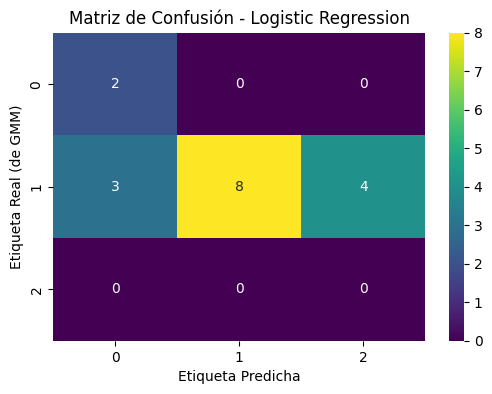

--- Resultados para Random Forest ---
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.53      0.70        15
           2       0.00      0.00      0.00         0

    accuracy                           0.59        17
   macro avg       0.44      0.51      0.40        17
weighted avg       0.92      0.59      0.67        17



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

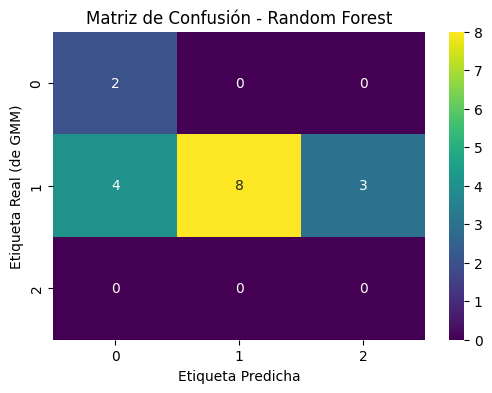

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.ca

--- Resultados para XGBoost ---
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.60      0.75        15
           2       0.00      0.00      0.00         0

    accuracy                           0.65        17
   macro avg       0.47      0.53      0.44        17
weighted avg       0.93      0.65      0.73        17



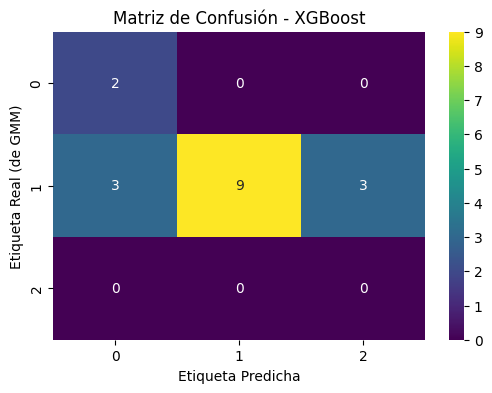

--- Resultados para SVC ---
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.53      0.70        15
           2       0.00      0.00      0.00         0

    accuracy                           0.59        17
   macro avg       0.44      0.51      0.40        17
weighted avg       0.92      0.59      0.67        17



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

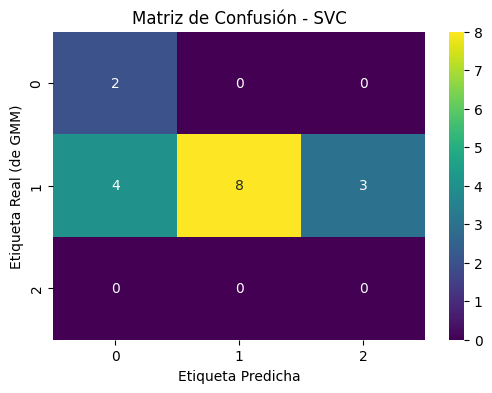

--- Resultados para Naive Bayes ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.73      0.85        15
           2       0.00      0.00      0.00         0

    accuracy                           0.65        17
   macro avg       0.33      0.24      0.28        17
weighted avg       0.88      0.65      0.75        17



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

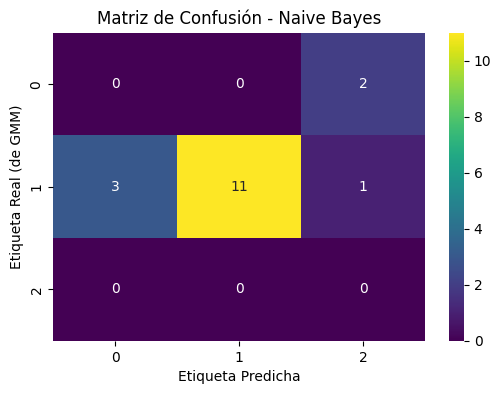

--- Resultados para MLP Classifier ---


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.47      0.64        15
           2       0.00      0.00      0.00         0

    accuracy                           0.53        17
   macro avg       0.44      0.49      0.38        17
weighted avg       0.92      0.53      0.62        17



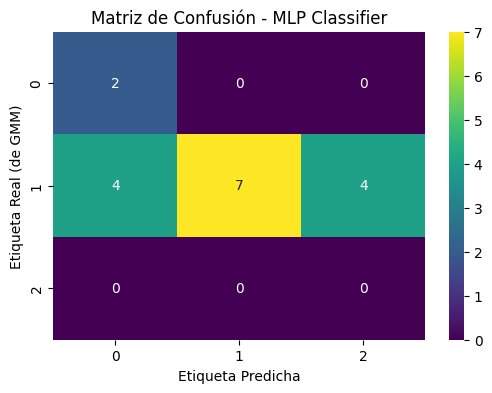

In [5]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=150),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'SVC': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(50,))
}

for name, model in models.items():
    clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf_pipeline.fit(X_train, y_train)
    y_pred = clf_pipeline.predict(X_test)
    print(f'--- Resultados para {name} ---')
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.title(f'Matriz de Confusión - {name}')
    plt.ylabel('Etiqueta Real (de GMM)')
    plt.xlabel('Etiqueta Predicha')
    plt.show()